# Kickstarter Projects

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

The data we will be looking at are from Kickstarter projects. The ultimate goal of this report is to help figure out what makes a kickstarter successful. In order to accomplish this, we'll compare and analyze the variables available to us, and attempt to identify the characteristics of a successful kickstarter campaign. For example, are successful campaigns funded by a larger number of backers with smaller pledges, or mostly by a small number of backers with larger pledges? Are the number of backers correlated with success? How valuable is each backer? Which types of kickstarters are most successful? We will do our best to answer these questions with the data that we have, but given the limited scope of our data, there will certainly be an abundance of room for further research on the matter. 

In [3]:
#Load data from csv into dataframe
#kickstarter data
ksdata = pd.read_csv('kickstarter_projects/ksprojects.csv')

print(ksdata.columns)

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


Let me briefly explain the titles of some of these columns of data. 
- The 'main_category' column refers to the broader category that this project falls under. The 'category' column is a more specific subset of the 'main_category' (i.e. if main_category = 'publishing', then perhaps 'category' = poetry)
- The goal column lists a number, but it is measured in the units given in the 'currency' column, meaning the various goals could be listed using multiple currencies, instead of all being listed in USD (however, the 'usd_goal_real' column is a conversion of the 'goal' column to USD, allowing for standardized comparisons)
- The above is also true for the 'pledged' column

In [4]:
print(ksdata.iloc[0].launched)
print(ksdata.iloc[0].deadline)

2015-08-11 12:12:28
2015-10-09


In [5]:
print(ksdata.head())

           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15

In order to analyze the timeframe of each project, I'm going to process the elements of the 'deadline' and 'launched' columns into several other columns: 'startyear', 'startmonth', 'endyear', and 'endmonth'. I don't believe the time of day when a project was launched to be very meaningful, so I will simply excise them.

In [6]:
#Process launch dates into their individual parts

years = []
months = []
days = []

r = 0
while r < len(ksdata.index):
    #launch date
    ld = ksdata.launched[r].split()[0]
    #year, month, day
    ymd = ld.split('-')
    years.append(ymd[0])
    months.append(ymd[1])
    days.append(ymd[2])
    r+=1
ksdata['launchyear'] = years
ksdata['launchmonth'] = months
ksdata['launchday'] = days

print(ksdata.head())

           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15

In [7]:
print(ksdata.launched[0].split())

['2015-08-11', '12:12:28']


In [8]:
#Process deadline dates into their individual parts

years = []
months = []
days = []

r = 0
while r < len(ksdata.index):
    #the deadline
    dl = ksdata.deadline[r]
    #year, month, day
    ymd = dl.split('-')
    years.append(ymd[0])
    months.append(ymd[1])
    days.append(ymd[2])
    r+=1
ksdata['endyear'] = years
ksdata['endmonth'] = months
ksdata['endday'] = days


print(ksdata.head())

           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  ...    country usd pledged  \
0  2015-08-11 12:12:28      0.0    failed  ...         GB         0.0   
1  2017-09-02 04:43:57   2421.0    failed  ...        

Now that the dates are in a form that I can work with, let's start answering some of the questions we posed earlier. The first thing I want to know is what does a successful kickstarter project look like? To do that, we will compare our variables to the result, listed in the 'state' column, to attempt to identify any patterns.

Now that the dates are in a form that I can work with, let's start answering some of the questions we posed earlier. The first thing I want to know is what does a successful kickstarter project look like? To do that, we will compare our variables to the result, listed in the 'state' column, to attempt to identify any patterns.

In [9]:
print(sorted(ksdata.launchyear.value_counts().index))
print(ksdata.launchyear.value_counts())

['1970', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
2015    77300
2014    67745
2016    57184
2017    52200
2013    44851
2012    41165
2011    26237
2010    10519
2009     1329
2018      124
1970        7
Name: launchyear, dtype: int64


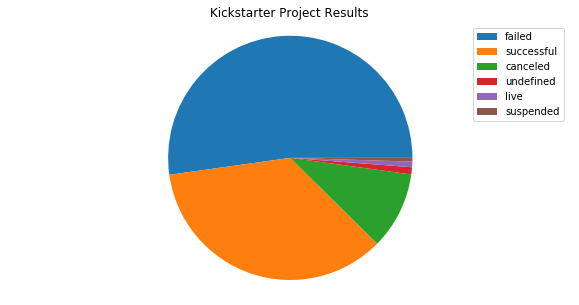

In [10]:
#generate a pie chart of project results
plt.figure(figsize=[10, 5])
plt.pie(ksdata.state.value_counts())
plt.axis('equal')
plt.title('Kickstarter Project Results')
plt.legend(ksdata.state.value_counts().index)

From this simple pie chart, we can clearly see that most projects end up failing, or otherwise not being completed. There are some ongoing projects, or 'undefined' projects in the data, but these categories are extremely small, and there is a clear pattern, even with some projects whose fates are unknown, with the data spanning from 2009 to present, there is obviously a pattern here. In the above list, you can see that there are some projects with an alleged launch year of 1970. I'm not sure why these anomalies exist in the data, but I can only guess it's due to some failure in the curation of the dataset. Regardless, there are only 7 such entries, so we will ignore them. Since we are looking at all the data at the moment, let's also see the breakdown of what kinds of projects people are submitting to kickstarter.

Text(0.5,1,'Kickstarter Project Broad Categories')

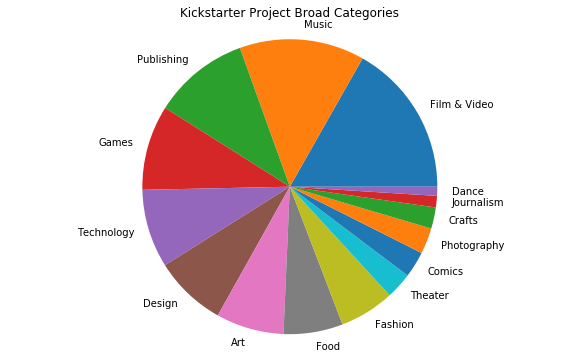

In [102]:
#generate a pie chart of project categories
plt.figure(figsize=[10, 6])
plt.pie(ksdata.main_category.value_counts(), labels = ksdata.main_category.value_counts().index)
plt.axis('equal')
plt.title('Kickstarter Project Broad Categories')

Obviously, there is a lot of variety, but the top four categories: Film, Music, Publishing, and Games, represent about half of all kickstarter projects. Technology, Design, and Art also represent about a quarter of the data.

In [12]:
#w and l for wins and losses, or successes and failures,
w = []
l = []

for r in ksdata.index:
    if ksdata.loc[r].state == 'successful':
        w.append(ksdata.loc[r])
    elif ksdata.loc[r].state != 'live':
        l.append(ksdata.loc[r])
        
windata = pd.DataFrame(w)
lossdata = pd.DataFrame(l)

The previous cell separated the data into successful projects, and unsuccessful projects, removing any ongoing projects from the data. Now we can take a look at the data for successful projects, and compare it to the data for unsuccessful projects, and see if we can make any useful conclusions in our analysis. The next few charts will illustrate the average monetary goal, number of backers, contribution per backer, and duration of fundraising for successful and unsuccessful projects. For the sake of standardizing all the measurements, we'll display every monetary datum in units of USD (even though international kickstarters have goals in other currencies).

Text(0.5,1,'Successful Kickstarter Categories')

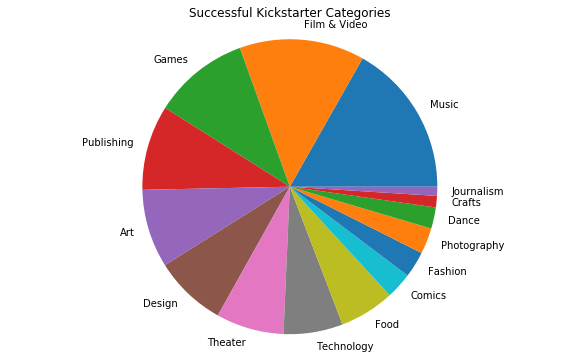

In [101]:
#generate a pie chart of project categories
plt.figure(figsize=[10, 6])
plt.pie(ksdata.main_category.value_counts(), labels = windata.main_category.value_counts().index)
plt.axis('equal')
plt.title('Successful Kickstarter Categories')

Text(0.5,1,'Failed Kickstarter Categories')

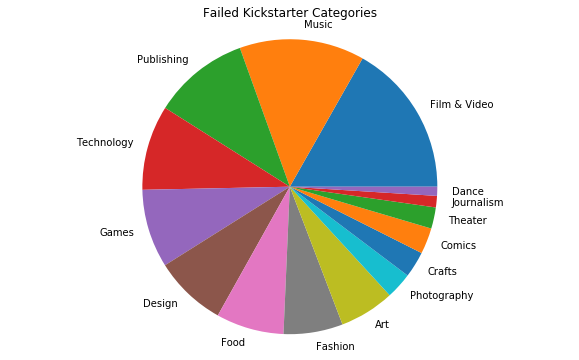

In [100]:
#generate a pie chart of project categories
plt.figure(figsize=[10, 6])
plt.pie(ksdata.main_category.value_counts(), labels = lossdata.main_category.value_counts().index)
plt.axis('equal')
plt.title('Failed Kickstarter Categories')

As we can see from these next 2 graphs, even though film and video is the most common category, more music projects are successful than film ones. Publishing and games have also swapped. Notably though, it seems that there are far less successful technology projects than there are failed ones. There are many possible explanations for why these data are the case (for example, maybe the general populace is more interested in games than published media, or the games on kickstarter are of a better quality than the publishing projects), but there is no evidence for any such explanations in the data, so nothing can be concluded besides the fact that certain categories of projects, as demonstrated in the pie charts, are more likely to have success than others.

Median (in red): 3700.0
Mean: 7842.988743289703
Standard Deviation 11470.551329230277


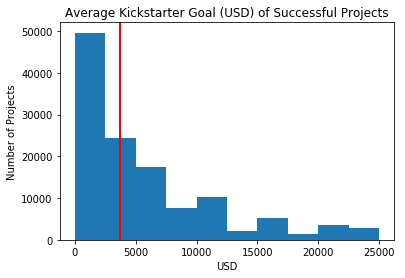

In [83]:
#generate average stats of successful projects
#average goal of successful projects
#first, remove outliers

condensed_windata = windata[np.abs(windata.usd_goal_real - windata.usd_goal_real.mean()) <= (3*windata.usd_goal_real.std())]

plt.hist(condensed_windata.usd_goal_real, range=(0, 25000))
plt.title('Average Kickstarter Goal (USD) of Successful Projects')
plt.axvline(condensed_windata.usd_goal_real.median(), color='r', linewidth=2)
plt.xlabel('USD')
plt.ylabel('Number of Projects')
print('Median (in red): ' + str(condensed_windata.usd_goal_real.median()))
print('Mean: ' + str(condensed_windata.usd_goal_real.mean()))
print('Standard Deviation ' + str(condensed_windata.usd_goal_real.std()))

Number of Total Failed Projects: 241906
Median (in red): 7500.0
Mean: 32388.406533743986
Standard Deviation 133809.84954435303


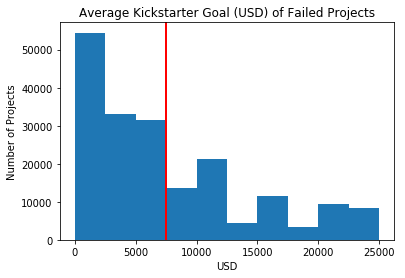

In [82]:
#generate average stats of successful projects
#average goal of failed projects
#first, remove outliers

condensed_lossdata = lossdata[np.abs(lossdata.usd_goal_real - lossdata.usd_goal_real.mean()) <= (3*lossdata.usd_goal_real.std())]

plt.hist(condensed_lossdata.usd_goal_real, range=(0,25000))
plt.title('Average Kickstarter Goal (USD) of Failed Projects')
plt.axvline(condensed_lossdata.usd_goal_real.median(), color='r', linewidth=2)
plt.xlabel('USD')
plt.ylabel('Number of Projects')
print('Number of Total Failed Projects: ' + str(len(lossdata.index)))
print('Median (in red): ' + str(condensed_lossdata.usd_goal_real.median()))
print('Mean: ' + str(condensed_lossdata.usd_goal_real.mean()))
print('Standard Deviation ' + str(condensed_lossdata.usd_goal_real.std()))


In [15]:
wins10k = windata[windata.usd_goal_real >= 10000]
print('Percentage of Successful projects that have a goal >= 10k USD: ' + str(100*round(len(wins10k.index)/len(windata.index), 2))+'%')

Percentage of Successful projects that have a goal >= 10k USD: 26.0%


In [16]:
fails10k = lossdata[lossdata.usd_goal_real >= 10000]
print('Percentage of failed projects that have a goal >= 10k USD: ' + str(100*round(len(fails10k.index)/len(lossdata.index), 2))+'%')

Percentage of failed projects that have a goal >= 10k USD: 45.0%


In [17]:
wins1k = windata[windata.usd_goal_real >= 1000]
print('Percentage of Successful projects that have a goal >= 1k USD: ' + str(100*round(len(wins1k.index)/len(windata.index), 2))+'%')

Percentage of Successful projects that have a goal >= 1k USD: 82.0%


In [18]:
fails1k = lossdata[lossdata.usd_goal_real >= 1000]
print('Percentage of failed projects that have a goal >= 1k USD: ' + str(100*round(len(fails1k.index)/len(lossdata.index), 2))+'%')

Percentage of failed projects that have a goal >= 1k USD: 90.0%


In [19]:
print('Median of all project goals: ' + str(ksdata.usd_goal_real.median()))
print('Median of successful project goals: ' + str(windata.usd_goal_real.median()))
print('Median of failed project goals: ' + str(lossdata.usd_goal_real.median()))

Median of all project goals: 5500.0
Median of successful project goals: 3837.74
Median of failed project goals: 7500.0


From the above graphs and calculations, we can see 2 things very clearly. First, the fundraising goals for the vast majority of projects are below 10,000 USD (an arbitrary number I picked for comparison since the scale of the histograms do not show the bulk of the data very well. In fact, after taking a look at the median of the whole dataset, we can see that almost half of the Kickstarter projects in this dataset are less than 5000 USD. Now, this fact isn't entirely surprising. It stands to reason that it would be easier to meet a lower goal. But, from the data, we can say to a prospective kickstarter creator that most successful projects have a fundraising goal of less than 5000 USD.

Median: 71.0


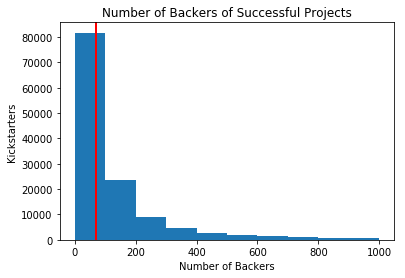

In [20]:
#generate average stats of successful projects
#average number of backers of successful projects

plt.hist(windata.backers, range=[0, 1000])
plt.axvline(windata.backers.median(), color='r', linewidth='2')
plt.ylabel('Kickstarters')
plt.xlabel('Number of Backers')
plt.title('Number of Backers of Successful Projects')
print('Median: ' + str(windata.backers.median()))

Median: 3.0


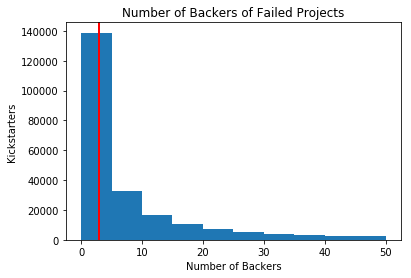

In [21]:
#generate average stats of successful projects
#average number of backers of failed projects

plt.hist(lossdata.backers, range=[0, 50])
plt.axvline(lossdata.backers.median(), color='r', linewidth='2')
plt.ylabel('Kickstarters')
plt.xlabel('Number of Backers')
plt.title('Number of Backers of Failed Projects')
print('Median: ' + str(lossdata.backers.median()))

The difference in the scale of the two above graphs is huge. That is in itself the most important feature of the above graphs. This shows us that generally, kickstarters seem to either take off, or they dont. The median number of backers of failed kickstarters is a measly 3, which means that at least half of the projects that fail don't get more than 3 backers. On the other hand, at least half of successful kickstarters have 70 or more backers.

Median (in red): 63.30717255717256
Mean: 91.12249740350727


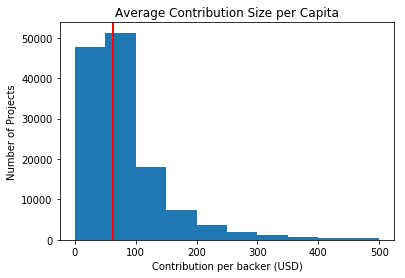

In [79]:
#generate average stats of successful projects
#average contribution per backer of successful projects
#usd_pledged_real / backers

windata['avg_win_contributions'] = (windata.usd_pledged_real / windata.backers)
contribution_data = pd.DataFrame(windata.loc[windata.avg_win_contributions != np.inf])

plt.hist(contribution_data.avg_win_contributions, range = [0, 500])
plt.axvline(contribution_data.avg_win_contributions.median(), color='r', linewidth=2)
plt.xlabel('Contribution per backer (USD)')
plt.ylabel('Number of Projects')
plt.title('Average Contribution Size per Capita')

print('Median (in red): ' + str(contribution_data.avg_win_contributions.median()))
print('Mean: ' + str(contribution_data.avg_win_contributions.mean()))

Median (in red): 36.02247191011236
Mean: 64.60270673465179


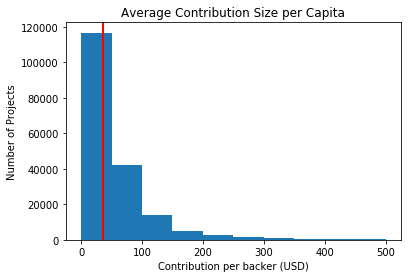

In [78]:
#generate average stats of successful projects
#average contribution per backer of failed projects

lossdata['avg_loss_contributions'] = (lossdata.usd_pledged_real / lossdata.backers)
contribution_data = pd.DataFrame(lossdata.loc[lossdata.backers != 0])

plt.hist(contribution_data.avg_loss_contributions, range = [0, 500])
plt.axvline(contribution_data.avg_loss_contributions.median(), color='r', linewidth=2)
plt.xlabel('Contribution per backer (USD)')
plt.ylabel('Number of Projects')
plt.title('Average Contribution Size per Capita')

print('Median (in red): ' + str(contribution_data.avg_loss_contributions.median()))
print('Mean: ' + str(contribution_data.avg_loss_contributions.mean()))

In the two graphs, you can see a clear difference in the measures of central tendency in the data. For the successful projects, half the projects had an average contribution of about 63 USD, while half of the projects had an average contribution of 36 USD or lower among failed kickstarters. For all of the prior 3 statistics that we examined among successful and failed kickstarters, one of the things that is evident from the graphs of the data is that there are a lot of outlying data elements that skew the mean of the dataset. In this case, the median is a better representation of the data, which is why the median is displayed as a red line in each of the above graphs. It's not as bad for the table of the kickstarter goals, but for all of the tables, the red line is far to the left side, and keep in mind that each line represents that midway point of the data elements, which is to say that half of the data are to the left of it, and half to the right. Most of the data is clustered around the medians rather than the means, because of the heavy influence of outliers (and in every case the range of the histogram had to be manually modified to even make the table even readable, among some other complications with the data).

While there are some clear patterns among the data of the kickstarters in this dataset, the dataset itself is very limited. It only consists of superficial data regarding each project. There are more comparisons you could do with the data in this dataset, but even if you do that, there are still a lot of unanswered questions. From this data, you can conclude that most kickstarter projects are small scale. Failed kickstarters have higher goals, less backers to meet them, and less support from each individual backer. But _why?_ The set of questions encompassed by that single word is not addressed by this data. The dataset that we have can be used to determine correlations, but obviously, correlation does not imply causation. For example, projects with higher goals may fail more often, but that doesn't mean that they are failing _because_ they set a higher goal. In order to help answer the underlying questions about these kickstarters, I would suggest that we gather other data. Keeping track of web traffic over time and backers over time could be very helpful tools for figuring out how support for the projects comes together. A simple survey for everyone who chooses to back a kickstarter with some brief questions like "Why did you choose to back this project?" and "How did you hear about this project?" could also go a long way to illuminating the mechanics of kickstarter success. 

In [186]:
print(ksdata.columns)

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'launchyear',
       'launchmonth', 'launchday', 'endyear', 'endmonth', 'endday'],
      dtype='object')
